# Actualizador manual del catálogo

In [4]:
from catalog_handler import Catalog, CatalogImageHandler
from pixel_table import PixelTable
from astropy.time import Time
import astropy.units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
CATALOG_PATH = "bsc5.dat"
EL_SAUCE = EarthLocation(lat=-30.4726064*u.deg, lon=-70.7653747*u.deg, height=789*u.m)
BEST_QUERY = "alt > 40 and Vmag < 4"
PIXTAB_PATH = "Interpolated_Data.pixtab"
OBS_TIME = "2019-9-7 08:30:10"

In [3]:
catalog = Catalog(CATALOG_PATH, Time(OBS_TIME))
pixtab = PixelTable(PIXTAB_PATH)
catalog_pixtab = catalog.find_on_pixtab(pixtab.df)

Cargando catalogo


VBox()

Exito...
Ubicando objetos en el pixtab...


VBox()

Exito!


In [4]:
catalog_pixtab.to_csv("catalog_0.pixtab", sep=' ', index=False)
# catalog_pixtab = pd.read_csv("catalog_0.pixtab", sep=" ")


Creando vista previa de pixeles


VBox()

Exito!


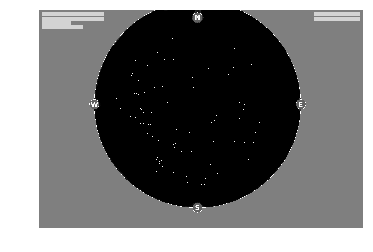

In [5]:
catalog_image = CatalogImageHandler(catalog_pixtab)
catalog_image.preview

In [17]:
%matplotlib qt


for indx in catalog_pixtab.index:
    x = catalog_pixtab.at[indx, "x"]
    y = catalog_pixtab.at[indx, "y"]
    highlighted_pixel = catalog_image.highlight_pixel(x,y)
    plt.imshow(highlighted_pixel)
    plt.axis("off")
    plt.show()

In [18]:
catalog_image.preview

In [17]:
df = pd.read_csv("temp_pixtab.dat", sep=" ")

# print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
#       ('double' if event.dblclick else 'single', event.button,
#        event.x, event.y, event.xdata, event.ydata))
new_row = pd.DataFrame({"new_x":[1], "new_y":[2]})
df.append(new_row, ignore_index = True)
df.to_csv("temp_pixtab2.dat", sep=' ', index=False)

In [9]:
df = pd.read_csv("temp_pixtab.dat", sep=" ")
out_df = catalog_pixtab.copy()
out_df["xcentroid"] = df["new_x"]
out_df["ycentroid"] = df["new_y"]
out_df = out_df[["xcentroid", "ycentroid", "alt", "az"]]

In [64]:
pixtab.df.query("x>=300 and x < 1200 and y<900").y.values.reshape(900, 900)[::9,::9]

array([[  0,   0,   0, ...,   0,   0,   0],
       [  9,   9,   9, ...,   9,   9,   9],
       [ 18,  18,  18, ...,  18,  18,  18],
       ...,
       [873, 873, 873, ..., 873, 873, 873],
       [882, 882, 882, ..., 882, 882, 882],
       [891, 891, 891, ..., 891, 891, 891]], dtype=int64)

In [39]:
out_df.query("xcentroid==557").alt.iloc[0]

49.567900968935795

In [53]:
np.arange(0, 900, 9).reshape(20,5)

array([[  0,   9,  18,  27,  36],
       [ 45,  54,  63,  72,  81],
       [ 90,  99, 108, 117, 126],
       [135, 144, 153, 162, 171],
       [180, 189, 198, 207, 216],
       [225, 234, 243, 252, 261],
       [270, 279, 288, 297, 306],
       [315, 324, 333, 342, 351],
       [360, 369, 378, 387, 396],
       [405, 414, 423, 432, 441],
       [450, 459, 468, 477, 486],
       [495, 504, 513, 522, 531],
       [540, 549, 558, 567, 576],
       [585, 594, 603, 612, 621],
       [630, 639, 648, 657, 666],
       [675, 684, 693, 702, 711],
       [720, 729, 738, 747, 756],
       [765, 774, 783, 792, 801],
       [810, 819, 828, 837, 846],
       [855, 864, 873, 882, 891]])

In [6]:
catalog = Catalog(CATALOG_PATH, Time(OBS_TIME))

Cargando catalogo


VBox()

Exito...


In [63]:
catalog.df.reset_index(drop=True)

,star_name,Vmag,ra,dec,alt,az,astropy_coords,astropy_altaz
0,9Alp CMa,-1.46,06h45m08.9s,-16d42m58s,35.178550,89.655882,"<SkyCoord (ICRS): (ra, dec) in deg\n (101.2...",<SkyCoord (AltAz: obstime=2019-09-07 08:30:10....
1,Alp Car,-0.72,06h23m57.1s,-52d41m45s,45.755756,135.950474,"<SkyCoord (ICRS): (ra, dec) in deg\n (95.98...",<SkyCoord (AltAz: obstime=2019-09-07 08:30:10....
2,19Bet Ori,0.12,05h14m32.3s,-08d12m06s,49.700344,63.983050,"<SkyCoord (ICRS): (ra, dec) in deg\n (78.63...",<SkyCoord (AltAz: obstime=2019-09-07 08:30:10....
3,Alp Eri,0.46,01h37m42.9s,-57d14m12s,60.462105,200.212450,"<SkyCoord (ICRS): (ra, dec) in deg\n (24.42...",<SkyCoord (AltAz: obstime=2019-09-07 08:30:10....
4,58Alp Ori,0.50,05h55m10.3s,+07d24m25s,31.784996,57.272365,"<SkyCoord (ICRS): (ra, dec) in deg\n (88.79...",<SkyCoord (AltAz: obstime=2019-09-07 08:30:10....
...,...,...,...,...,...,...,...,...
160,Del1Gru,3.97,22h29m16.2s,-43d29m44s,37.599757,236.428625,"<SkyCoord (ICRS): (ra, dec) in deg\n (337.3...",<SkyCoord (AltAz: obstime=2019-09-07 08:30:10....
161,98 Aqr,3.97,23h22m58.2s,-20d06m02s,42.305280,269.950555,"<SkyCoord (ICRS): (ra, dec) in deg\n (350.7...",<SkyCoord (AltAz: obstime=2019-09-07 08:30:10....
162,5Gam Mon,3.98,06h14m51.3s,-06d16m29s,36.451060,73.928640,"<SkyCoord (ICRS): (ra, dec) in deg\n (93.71...",<SkyCoord (AltAz: obstime=2019-09-07 08:30:10....
163,Del Vol,3.98,07h16m49.8s,-67d57m26s,36.873869,154.597872,"<SkyCoord (ICRS): (ra, dec) in deg\n (109.2...",<SkyCoord (AltAz: obstime=2019-09-07 08:30:10....


In [59]:
pixtab.df.alt.values

array([nan, nan, nan, ..., nan, nan, nan])

In [70]:
pixtab = PixelTable()
df = pixtab.df
df

,x,y,alt,az,alt_err,az_err,sample_size
0,0,0,NaN,NaN,NaN,NaN,0
1,1,0,NaN,NaN,NaN,NaN,0
2,2,0,NaN,NaN,NaN,NaN,0
3,3,0,NaN,NaN,NaN,NaN,0
4,4,0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...
1609915,1543,1039,NaN,NaN,NaN,NaN,0
1609916,1544,1039,NaN,NaN,NaN,NaN,0
1609917,1545,1039,NaN,NaN,NaN,NaN,0
1609918,1546,1039,NaN,NaN,NaN,NaN,0


In [69]:
list(zip(df.x.values,
                                                        df.y.values,
                                                        df.alt.values,
                                                        df.az.values,
                                                        df.alt_err.values,
                                                        df.az_err.values,
                                                        df.sample_size.values))

[(0, 0, nan, nan, nan, nan, 0),
 (1, 0, nan, nan, nan, nan, 0),
 (2, 0, nan, nan, nan, nan, 0),
 (3, 0, nan, nan, nan, nan, 0),
 (4, 0, nan, nan, nan, nan, 0),
 (5, 0, nan, nan, nan, nan, 0),
 (6, 0, nan, nan, nan, nan, 0),
 (7, 0, nan, nan, nan, nan, 0),
 (8, 0, nan, nan, nan, nan, 0),
 (9, 0, nan, nan, nan, nan, 0),
 (10, 0, nan, nan, nan, nan, 0),
 (11, 0, nan, nan, nan, nan, 0),
 (12, 0, nan, nan, nan, nan, 0),
 (13, 0, nan, nan, nan, nan, 0),
 (14, 0, nan, nan, nan, nan, 0),
 (15, 0, nan, nan, nan, nan, 0),
 (16, 0, nan, nan, nan, nan, 0),
 (17, 0, nan, nan, nan, nan, 0),
 (18, 0, nan, nan, nan, nan, 0),
 (19, 0, nan, nan, nan, nan, 0),
 (20, 0, nan, nan, nan, nan, 0),
 (21, 0, nan, nan, nan, nan, 0),
 (22, 0, nan, nan, nan, nan, 0),
 (23, 0, nan, nan, nan, nan, 0),
 (24, 0, nan, nan, nan, nan, 0),
 (25, 0, nan, nan, nan, nan, 0),
 (26, 0, nan, nan, nan, nan, 0),
 (27, 0, nan, nan, nan, nan, 0),
 (28, 0, nan, nan, nan, nan, 0),
 (29, 0, nan, nan, nan, nan, 0),
 (30, 0, nan, nan, n